In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings(action = 'ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
df_fraud = pd.read_csv('fraud_oracle.csv')
df_fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
df_fraud.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [4]:
df_fraud.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [5]:
# We can observe that there are no null values present.

<Figure size 1440x576 with 0 Axes>

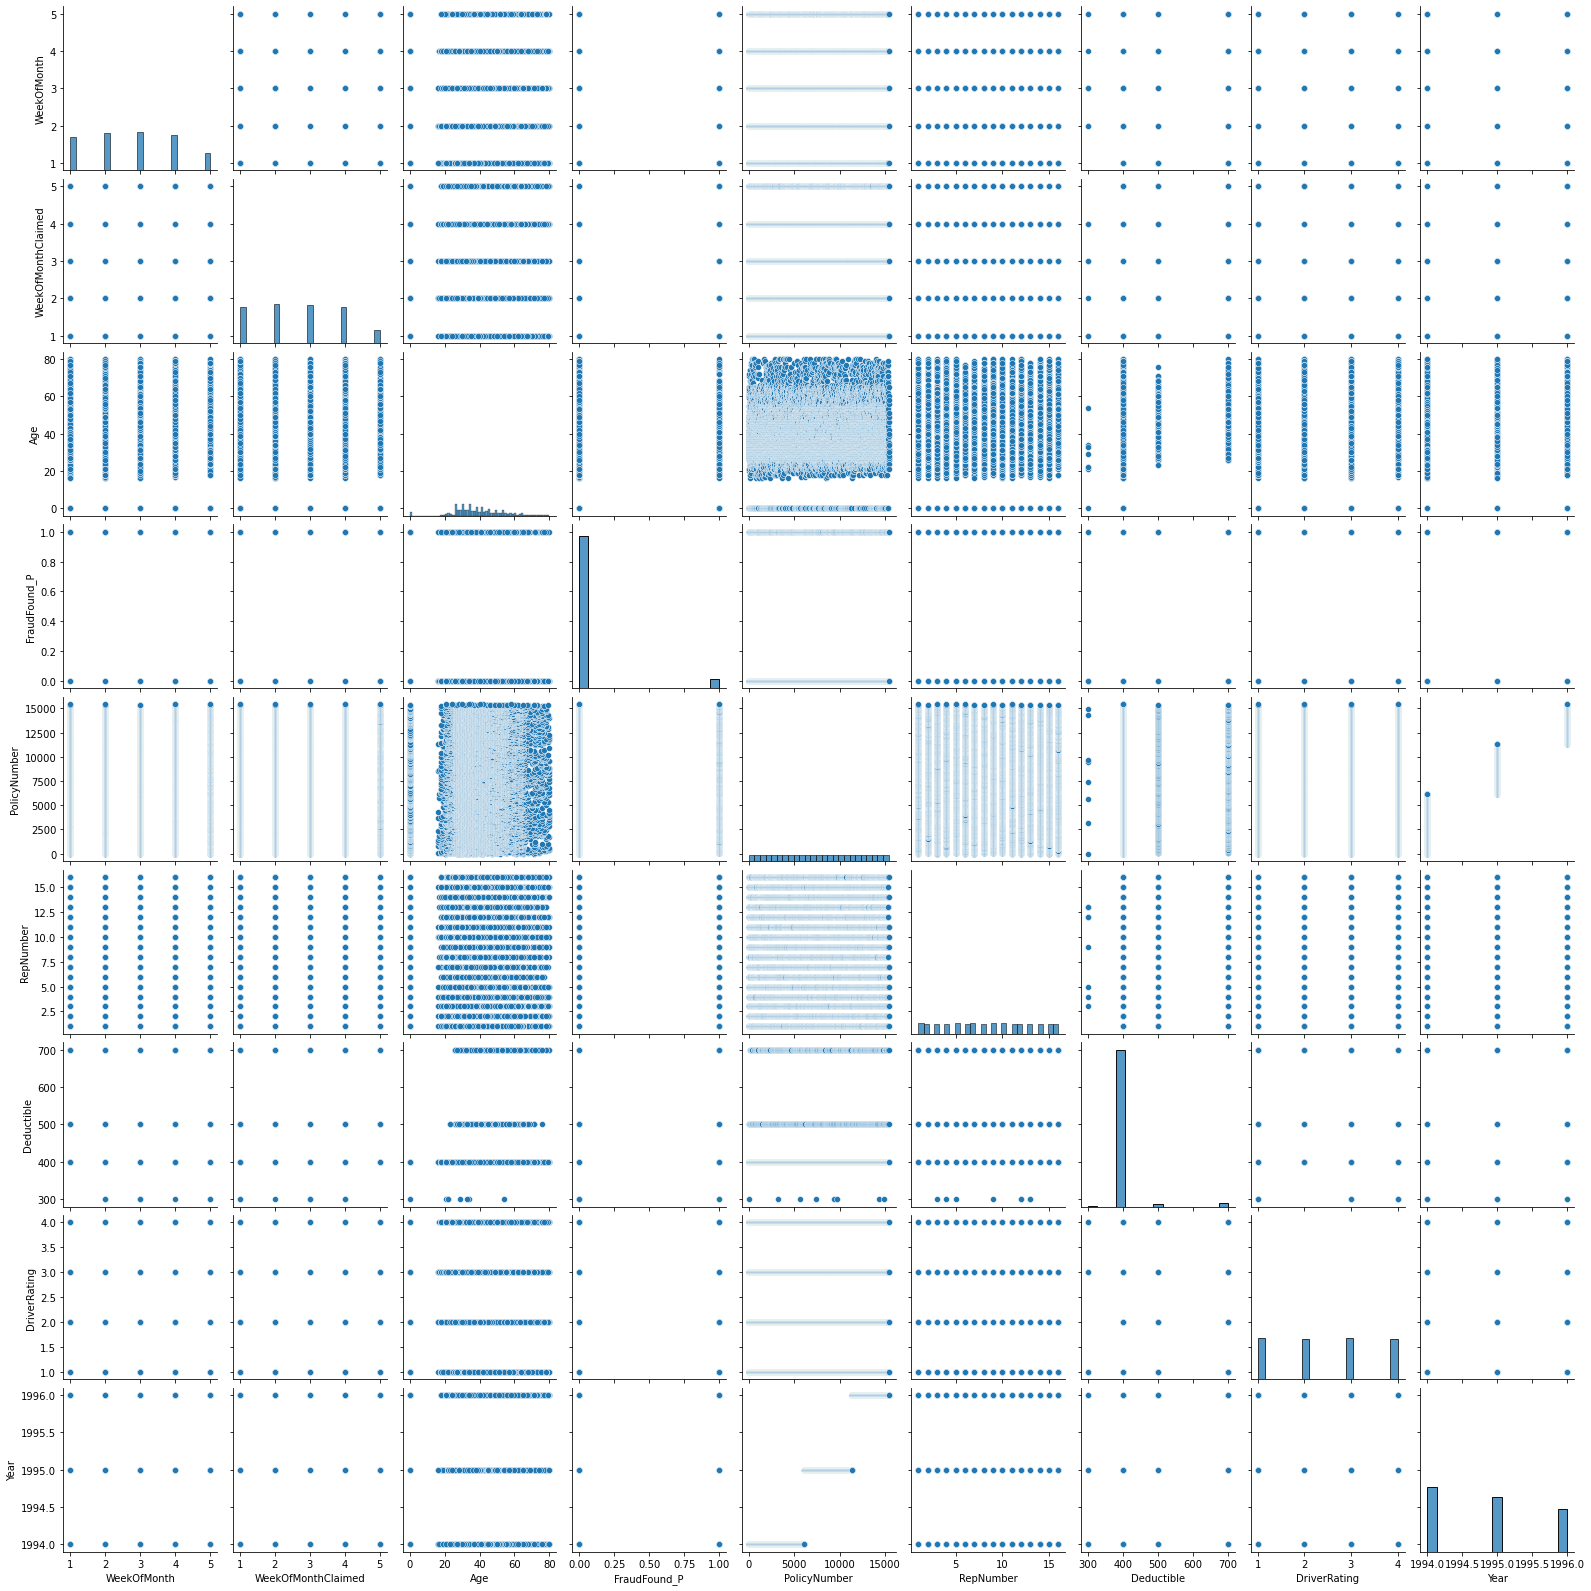

In [8]:
plt.figure(figsize = (20, 8))
sns.pairplot(df_fraud)
plt.show()

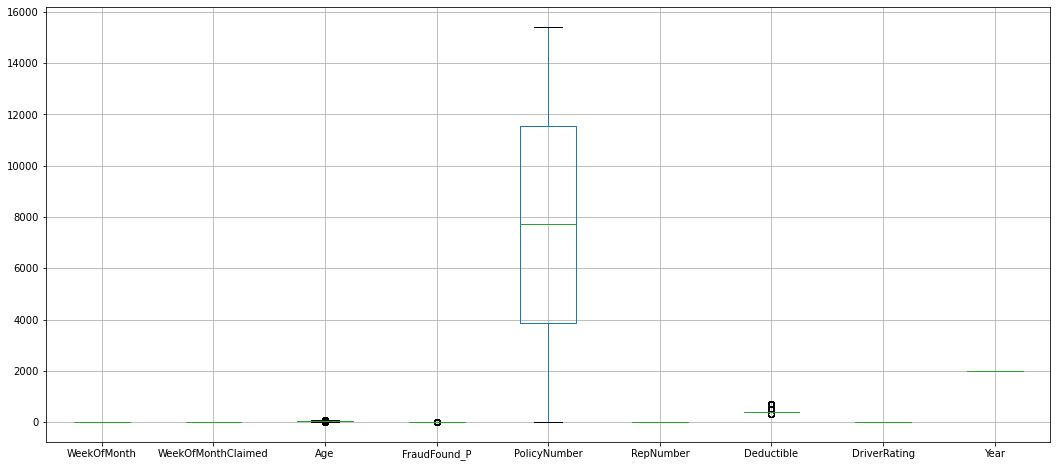

In [6]:
plt.figure(figsize = (18, 8))
df_fraud.boxplot()
plt.show()

In [10]:
# From the above boxplot we can observe that there are some outliers present in 'Age', and 'Deductible' variables.

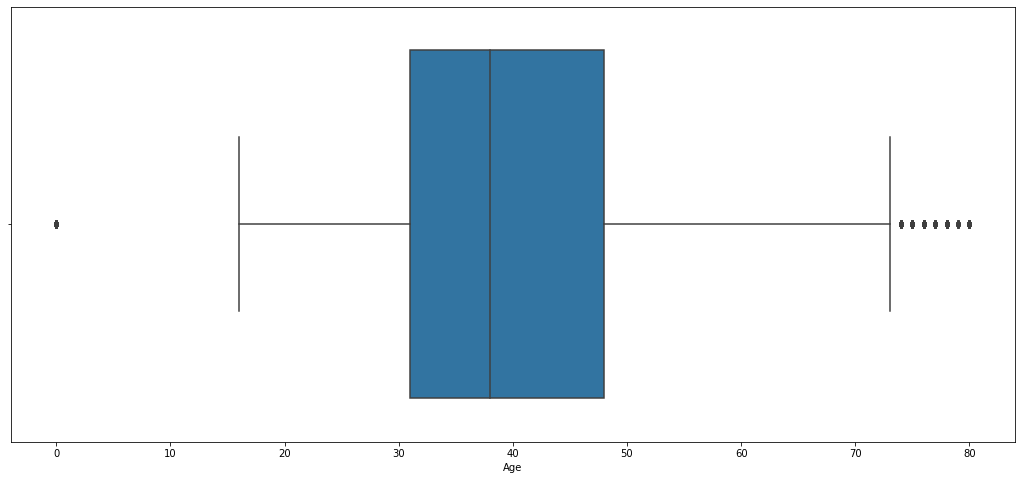

In [7]:
plt.figure(figsize = (18, 8))
sns.boxplot(df_fraud['Age'])
plt.show()

In [12]:
# So we remove outliers using interquartile range method.

In [13]:
Q1 = df_fraud['Age'].quantile(0.25)

Q3 = df_fraud['Age'].quantile(0.75)

IQR = Q3 - Q1

print(IQR)

17.0


In [14]:
df_out_IQR = df_fraud[~((df_fraud['Age'] < (Q1 - 1.5 * IQR)) | (df_fraud['Age'] > (Q3 + 1.5 * IQR)))]

In [15]:
df_fraud.shape

(15420, 33)

In [16]:
df_out_IQR.shape

(14873, 33)

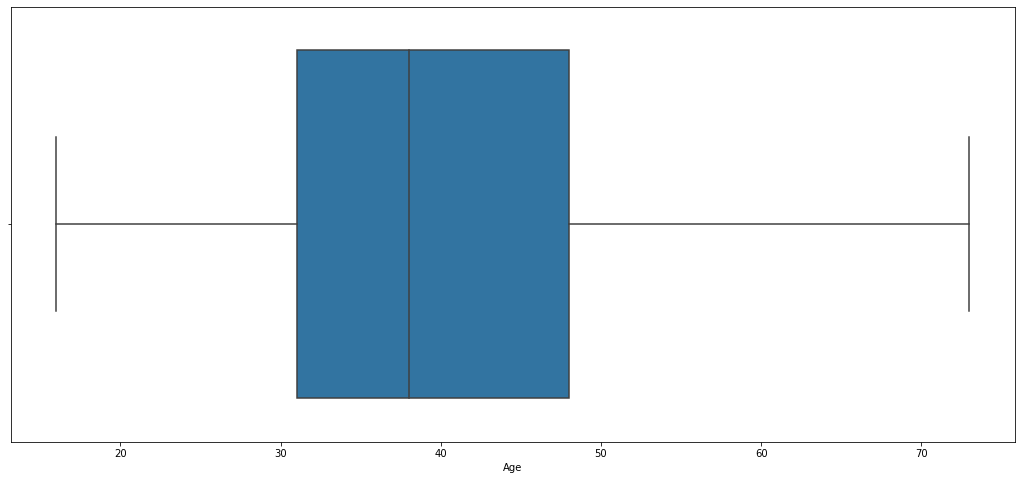

In [17]:
plt.figure(figsize = (18, 8))
sns.boxplot(df_out_IQR['Age'])
plt.show()

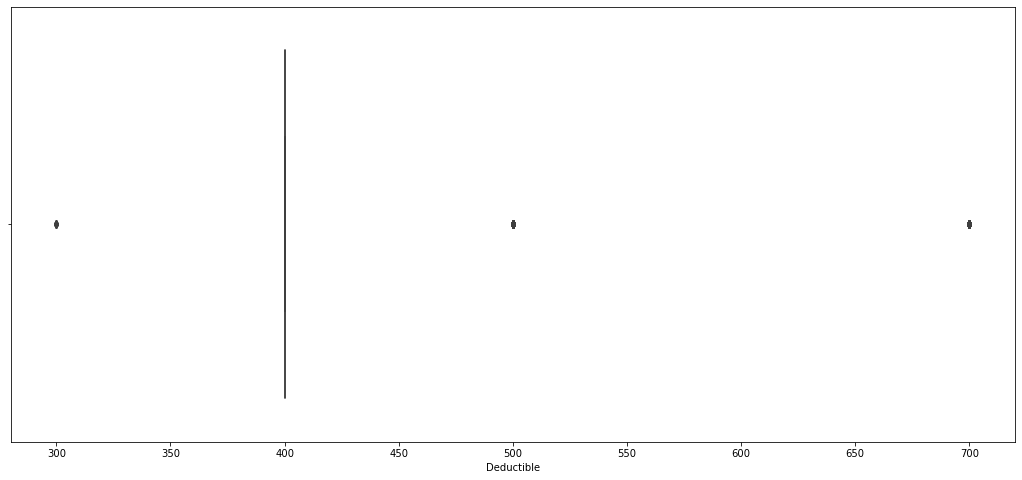

In [18]:
plt.figure(figsize = (18, 8))
sns.boxplot(df_fraud['Deductible'])
plt.show()

In [19]:
Q1 = df_fraud['Deductible'].quantile(0.25)

Q3 = df_fraud['Deductible'].quantile(0.75)

IQR = Q3 - Q1

print(IQR)

0.0


In [20]:
df_out_IQR1 = df_fraud[~((df_fraud['Deductible'] < (Q1 - 1.5 * IQR)) | (df_fraud['Deductible'] > (Q3 + 1.5 * IQR)))]

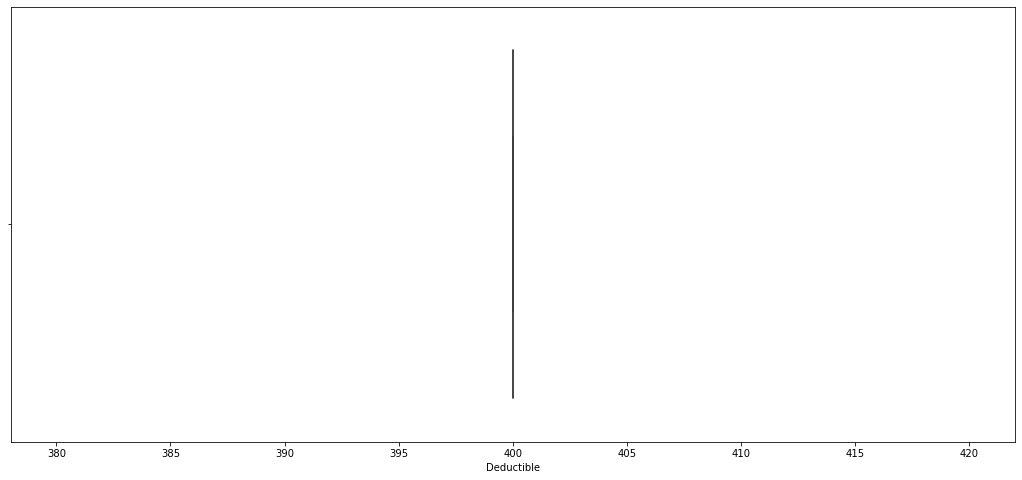

In [21]:
plt.figure(figsize = (18, 8))
sns.boxplot(df_out_IQR1['Deductible'])
plt.show()

In [22]:
# We can see that outliers have been removed from 'Age' and 'Deductible' variables.

In [23]:
df_fraud.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [24]:
# type your code here
df_fraud.describe(include = ['object'])

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


In [25]:
df_fraud.describe(include = ['int64', 'float64'])

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [26]:
df_fraud.count(numeric_only = True)

WeekOfMonth           15420
WeekOfMonthClaimed    15420
Age                   15420
FraudFound_P          15420
PolicyNumber          15420
RepNumber             15420
Deductible            15420
DriverRating          15420
Year                  15420
dtype: int64

In [27]:
# We can see that there 9 numeric variables.

In [28]:
df_fraud.count(numeric_only = False)

Month                   15420
WeekOfMonth             15420
DayOfWeek               15420
Make                    15420
AccidentArea            15420
DayOfWeekClaimed        15420
MonthClaimed            15420
WeekOfMonthClaimed      15420
Sex                     15420
MaritalStatus           15420
Age                     15420
Fault                   15420
PolicyType              15420
VehicleCategory         15420
VehiclePrice            15420
FraudFound_P            15420
PolicyNumber            15420
RepNumber               15420
Deductible              15420
DriverRating            15420
Days_Policy_Accident    15420
Days_Policy_Claim       15420
PastNumberOfClaims      15420
AgeOfVehicle            15420
AgeOfPolicyHolder       15420
PoliceReportFiled       15420
WitnessPresent          15420
AgentType               15420
NumberOfSuppliments     15420
AddressChange_Claim     15420
NumberOfCars            15420
Year                    15420
BasePolicy              15420
dtype: int

In [29]:
# We can see that there 24 non-numeric variables.

In [30]:
X = df_fraud.drop(['FraudFound_P'], axis = 1)

Y = df_fraud['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

In [31]:
print("X_train", X_train.shape, "y_train", y_train.shape)
print("X_test", X_test.shape, "y_test", y_test.shape)

X_train (10794, 32) y_train (10794,)
X_test (4626, 32) y_test (4626,)


In [32]:
df_fraud.skew()

WeekOfMonth           0.115426
WeekOfMonthClaimed    0.158233
Age                   0.152314
FraudFound_P          3.711164
PolicyNumber          0.000000
RepNumber             0.006628
Deductible            6.078803
DriverRating          0.009283
Year                  0.245689
dtype: float64

In [33]:
df_fraud.kurt()

WeekOfMonth           -1.101157
WeekOfMonthClaimed    -1.085554
Age                    0.798666
FraudFound_P          11.774267
PolicyNumber          -1.200000
RepNumber             -1.191876
Deductible            36.822777
DriverRating          -1.363286
Year                  -1.410715
dtype: float64

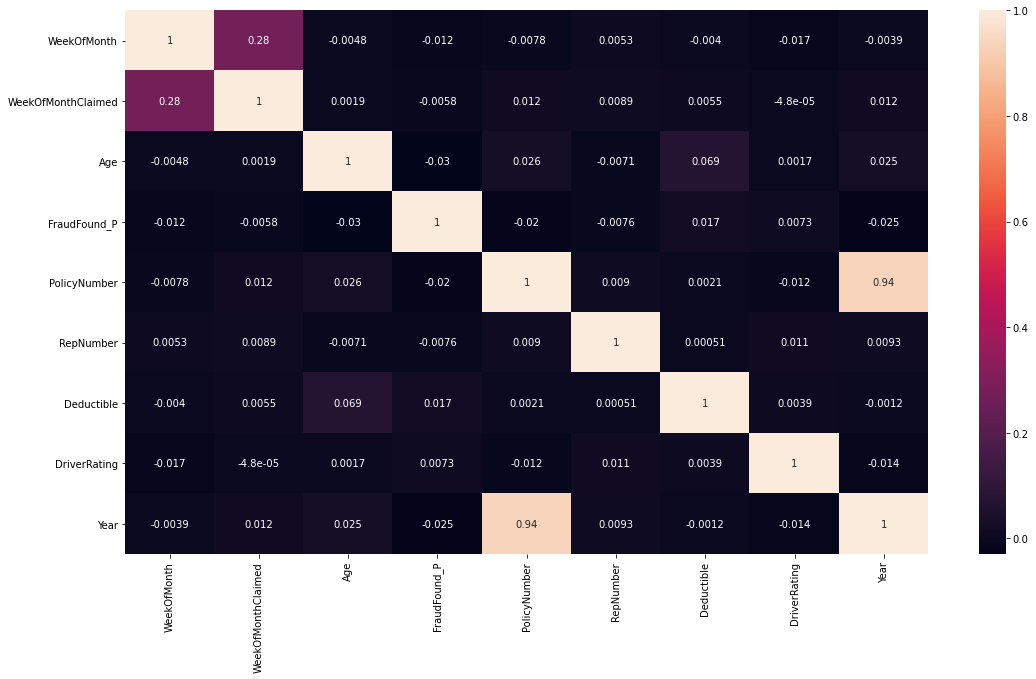

In [34]:
corr = df_fraud.corr()

plt.figure(figsize = (18, 10))
sns.heatmap(corr, annot = True)
plt.show()